#### Verdant Benjamin && Commandeur Nicolas
# INFO905 TP2 : MNIST

In [21]:
import numpy as np

from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score

import matplotlib as mpl
import matplotlib . pyplot as plt

In [2]:
mnist = fetch_openml('mnist_784', version=1, cache=True, as_frame=False)
mnist.target = mnist.target.astype(np.int8)
mnist.target

array([5, 0, 4, ..., 4, 5, 6], dtype=int8)

In [3]:
#mnist.target = np.random.RandomState(seed=42).permutation(mnist.target)
#mnist.data = np.random.RandomState(seed=42).permutation(mnist.data)
# Autre façon de faire
p = np.random.permutation(len(mnist.target))
mnist.target = mnist.target[p]
mnist.data = mnist.data[p]

In [4]:
mnist.target

array([7, 6, 4, ..., 5, 5, 7], dtype=int8)

In [5]:
mnist_t_train, mnist_t_test = train_test_split(mnist.target, test_size=0.33, shuffle=False)
mnist_d_train, mnist_d_test = train_test_split(mnist.data, test_size=0.33, shuffle=False)
print(f"{len(mnist_t_test)} valeurs : {mnist_t_test}")
print(f"{len(mnist_d_test)} valeurs : {mnist_d_test}")

23100 valeurs : [9 0 1 ... 5 5 7]
23100 valeurs : [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


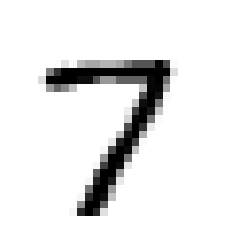

In [6]:
some_digit = mnist.data[0]
some_digit_image = some_digit.reshape(28, 28)
plt.imshow(some_digit_image, cmap=mpl.cm.binary, interpolation="nearest")
plt.axis("off")
plt.show()

In [15]:
X = mnist_d_train
clf=make_pipeline(StandardScaler(), SGDClassifier(tol=1e-3))
Y = [i==8 for i in mnist_t_train]
clf.fit(X, Y)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('sgdclassifier', SGDClassifier())])

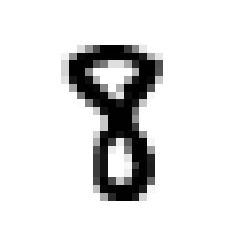

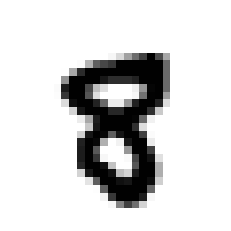

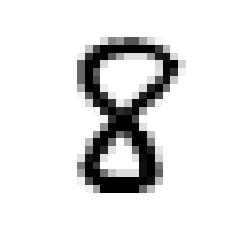

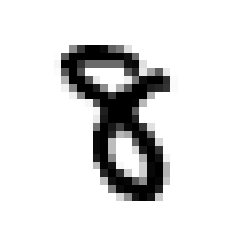

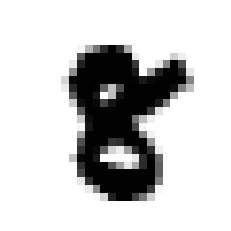

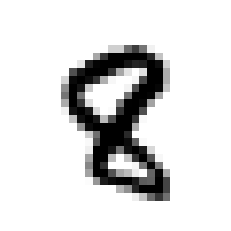

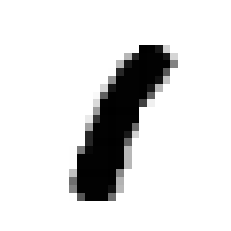

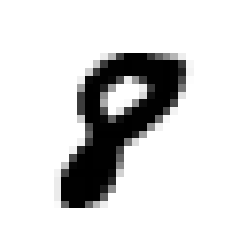

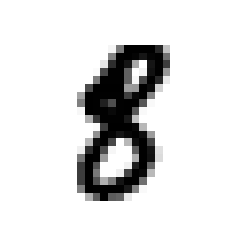

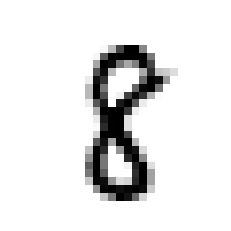

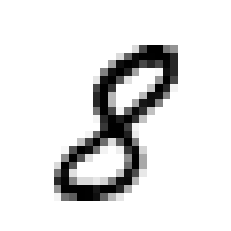

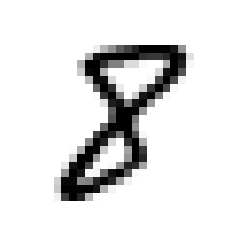

In [16]:
predictions = clf.predict(mnist_d_test)
for p in range(0, 100):
    if predictions[p]:
        digit = mnist_d_test[p]
        digit_image = digit.reshape(28,28)
        plt.imshow(digit_image, cmap=mpl.cm.binary, interpolation="nearest")
        plt.axis("off")
        plt.show()


In [19]:
print(f"Mean accuracy{clf.score(X, Y)}")
print(f"")

0.9615778251599147


In [29]:
forest = RandomForestClassifier(max_depth=2, random_state=0, n_jobs=-1)
forest.classes_ = [i for i  in range(0,10)]
forest.n_classes_ = 10
forest.n_outputs_ = 10
Y = [number==i for i in mnist_t_train for number in range(0,10)]
forest.fit(X,Y)
print(forest.classes_)

ValueError: Found input variables with inconsistent numbers of samples: [46900, 469000]